In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression


In [2]:
data = load_iris()  # or load_breast_cancer()
X = data.data
y = data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [5]:
# Predict the test set
y_pred = model.predict(X_test)

# Print the classification report
print("Classification Report for Logistic Regression:\n")
print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



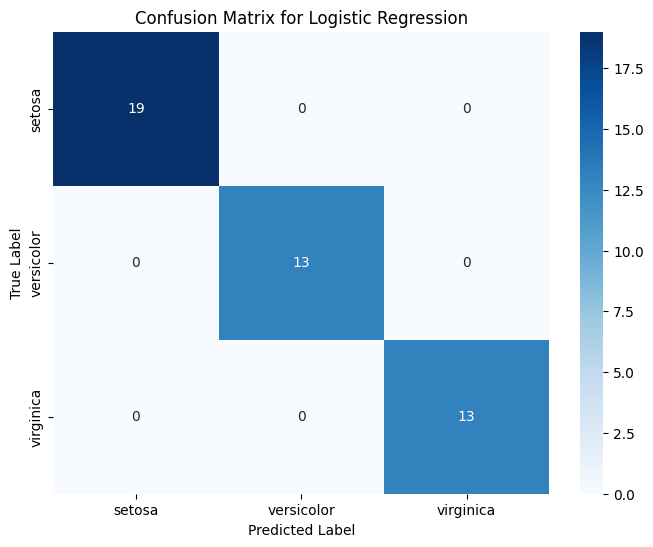

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

Your Task:

* - Choose Any dataset (Binary Classification)  
* - Load Dataset
* - Use the Fully connected NN you designe din the 2nd Last Lab
* - Train your FCNN on that dataset
* - Do the evluation useing Precision, Recall, F-Measure, ROC
* - Plot a confusion Metric


Loading the Dataset

In [7]:
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Pre-Processing

In [11]:
data['Age'] = data['Age'].fillna(data['Age'].mode()[0])
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])
data.isna().sum()

encoder = LabelEncoder()
data['Sex'] = encoder.fit_transform(data['Sex'])
data['Ticket'] = encoder.fit_transform(data['Ticket'])
data['Cabin'] = encoder.fit_transform(data['Cabin'])
data['Embarked'] = encoder.fit_transform(data['Embarked'])

Y = data['Survived']
X = data[['Pclass' , 'Sex' , 'Age' , 'SibSp' , 'Parch' , 'Cabin' , 'Embarked']]

X_train , Y_train , X_test , Y_test = train_test_split(X , Y , test_size = 0.3 , random_state = 42)

Fully Connected NN

In [12]:
def weights_biases(layers):
    weights_bias = {}
    num_layers = len(layers) - 1  # Number of layers (excluding input layer)

    for num in range(1, num_layers + 1):
        current_layer_size = layers[num]
        previous_layer_size = layers[num - 1]

        # Initialize weights and biases for the current layer
        weights_bias['W' + str(num)] = np.random.randn(current_layer_size, previous_layer_size) * 0.01
        weights_bias['b' + str(num)] = np.zeros((current_layer_size, 1))

    return weights_bias

In [16]:
#Initializing layers
height, width = X_train.shape
input_layer = height * width
hidden_layers = [128 , 128]
output_layer = len(np.unique(y_train))

In [23]:
#Activation Functions
def sigmoid(x):  #for hidden Layers
    return (1/(1+np.exp(-x)))

def softmax(x): #for output layer
    exp_x = np.exp(x - np.max(x, axis=0))
    return exp_x / np.sum(exp_x, axis=0)

def forward_pass_MLP(input, weights_bias):
    x = (input.shape[0], -1)
    num_layers = len(weights_bias) // 2
    answers = []

    for num in range(1 , num_layers+1):
        weights = weights_bias['W' + str(num)]
        bias = weights_bias['b' + str(num)]
        equation = np.dot(weights , x) #wx + b
        result = sigmoid(equation)
        answers.append((equation , result))
        x = result

    #for output
    Weights_output = weights_bias['W' + str(num_layers)]
    Bias_output = weights_bias['b' + str(num_layers)]
    equation_output = np.dot(Weights_output.T , result) + Bias_output
    result_output = softmax(equation_output)

    answers.append(result_output)

    return result_output , answers

In [40]:
layers = [input_layer] + hidden_layers + [output_layer]
parameters = weights_biases(layers)

train_predict , ans_train_predict = forward_pass_MLP(X_train, parameters)
train_predict , ans_val_predict = forward_pass_MLP(X_test, parameters)

Evaluation using confusion matrix

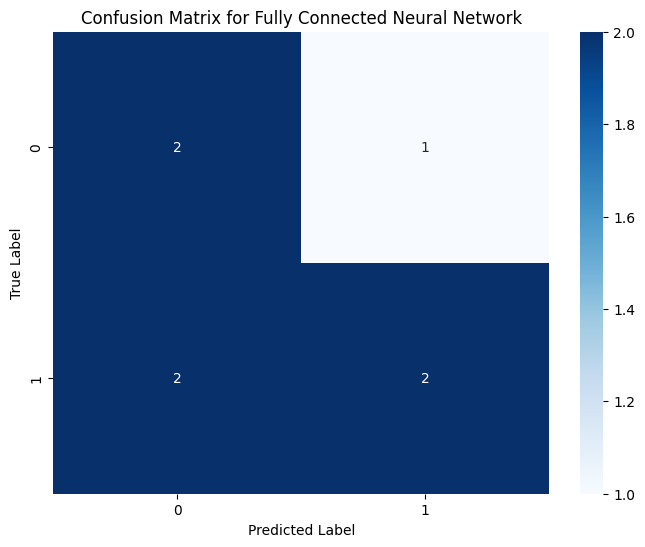

In [34]:
cm = confusion_matrix(y_test, ans_val_predict)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Fully Connected Neural Network')
plt.show()

Evaluation Measures

In [38]:
acc = accuracy_score(y_test , ans_val_predict)
prec = precision_score(y_test , ans_val_predict)
recall = recall_score(y_test , ans_val_predict)
f1 = f1_score(y_test , ans_val_predict)

In [40]:
print("Accuracy : " , acc*100)
print("Precision : " , prec*100)
print("Recall : " , recall*100)
print("F1 - Score : " , f1 * 100)

Accuracy :  57.14285714285714
Precision :  66.66666666666666
Recall :  50.0
F1 - Score :  57.14285714285715
